In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_curve, auc
from sklearn import metrics
import shap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

# 1. LOAD DATA

In [2]:
X= pd.read_csv('../Data/ncea_dummyData.csv')

In [3]:
y=pd.read_csv('../Data/ncea_targetData.csv')

In [4]:
y=y['Student: Age (Retention to 17)']

In [5]:
#X= X.drop('QualProportion',axis=1)

In [6]:
#check data 
X.head()

,"('Decile',)","('Proportions',)","('Ethnicity',)_2","('Ethnicity',)_3","('Ethnicity',)_4","('Ethnicity',)_5","('Ethnicity',)_6","('Ethnicity',)_7","('Gender',)_Male","('SchoolType',)_Contributing",...,"('Region',)_Waikato","('Region',)_Waimakariri","('Region',)_Wairarapa","('Region',)_Waitaki","('Region',)_Wellington Central","('Region',)_West Coast-Tasman","('Region',)_Whanganui","('Region',)_Whangaparaoa","('Region',)_Whangarei","('Region',)_Wigram"
0,4,0.38227,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0.38227,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.38227,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.38227,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.38227,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Final check for null values
X.isna().sum()

('Decile',)                      0
('Proportions',)                 0
('Ethnicity',)_2                 0
('Ethnicity',)_3                 0
('Ethnicity',)_4                 0
                                ..
('Region',)_West Coast-Tasman    0
('Region',)_Whanganui            0
('Region',)_Whangaparaoa         0
('Region',)_Whangarei            0
('Region',)_Wigram               0
Length: 91, dtype: int64

## 2. SPLIT DATA

In [8]:
# stratified sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

## 3. DEFINE, FIT AND EVALUATE LOGISTIC REGRESSION MODEL 

In [9]:
#Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

target_names = ['stayed', 'left']
# Print the classification report
print(metrics.classification_report(y_test, y_pred_logreg, target_names = target_names))


# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_logreg))

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_logreg)
print("Accuracy base model:", accuracy)

              precision    recall  f1-score   support

      stayed       0.79      0.92      0.85     73691
        left       0.67      0.41      0.51     30338

    accuracy                           0.77    104029
   macro avg       0.73      0.66      0.68    104029
weighted avg       0.75      0.77      0.75    104029

[[67428  6263]
 [17820 12518]]
Accuracy base model: 0.768497245960261


## 3.1 GRID SEARCH LOGISTIC REGRESSION

In [10]:
lr_params = {
    'penalty': ['l2'],
    'C': [1, 10, 100]
}

In [11]:
# Create the GridSearchCV object
grid_searchLR = GridSearchCV(logreg, lr_params, cv=5, scoring='accuracy', return_train_score=True)

# Fit the GridSearchCV object to the data
grid_searchLR.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_searchLR.best_params_)

# Print the best score
print("Best score: ", grid_searchLR.best_score_)

# Make predictions on the test data
y_predLR = grid_searchLR.predict(X_test)

# Print the test accuracy score
print("Test accuracy: ", accuracy_score(y_test, y_predLR))

Best parameters:  {'C': 100, 'penalty': 'l2'}
Best score:  0.7682360005073774
Test accuracy:  0.7686125984100587


## 4. DEFINE, FIT AND EVALUATE DECISION TREE CLF

In [12]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


# Print the classification report
print(metrics.classification_report(y_test, y_pred_dt, target_names = target_names))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_dt))


              precision    recall  f1-score   support

      stayed       0.78      0.92      0.85     73691
        left       0.67      0.38      0.48     30338

    accuracy                           0.76    104029
   macro avg       0.73      0.65      0.67    104029
weighted avg       0.75      0.76      0.74    104029

[[68083  5608]
 [18875 11463]]


# 4.1 GRIDSEARCH DECISION TREE 

In [13]:
# Define the parameter grid for grid search
param_grid = {'max_depth': [3, 5, 7, 9],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 3],
              'max_features': [None, 'sqrt', 'log2']}

# Initialize the decision tree classifier
clf = tree.DecisionTreeClassifier()

# Perform grid search
grid_search_dt = GridSearchCV(clf, param_grid, cv=5)
grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search_dt.best_params_

# Train a decision tree classifier with the best hyperparameters
clf = tree.DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                   min_samples_split=best_params['min_samples_split'],
                                   min_samples_leaf=best_params['min_samples_leaf'],
                                   max_features=best_params['max_features'])
clf.fit(X_train, y_train)

# Predict on the test data
y_pred_gsdt = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred_gsdt)
print("Accuracy:", accuracy)
print('Best Paramas DT :', grid_search_dt.best_params_)

Accuracy: 0.7692854877005451
Best Paramas DT : {'max_depth': 9, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 5}


## 5 DEFINE, FIT AND EVALUATE NAIVE BAYES

In [14]:
# Create a NB classifier
nb= GaussianNB()

# Train the classifier on the training data
nb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_NB = nb.predict(X_test)

#

# Print the classification report
print(metrics.classification_report(y_test, y_pred_NB))

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_NB))

              precision    recall  f1-score   support

           0       0.78      0.50      0.61     73691
           1       0.35      0.66      0.46     30338

    accuracy                           0.55    104029
   macro avg       0.57      0.58      0.54    104029
weighted avg       0.66      0.55      0.57    104029

[[37181 36510]
 [10250 20088]]


## 5.1 GRIDSEARCH NAIVE BAYES

In [15]:
# Define the parameters you want to search
param_grid = {'var_smoothing': np.logspace(-9, 9, num=19)}

# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Initialize GridSearchCV with the desired parameters
grid_search = GridSearchCV(nb, param_grid, cv=5)

# Fit the GridSearchCV object to your data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the GridSearchCV object
best_params = grid_search.best_params_

# Use the best hyperparameters to initialize the final classifier
GSnb = GaussianNB(**best_params)

# Fit the final classifier to the entire training data
GSnb.fit(X_train, y_train)

#make predictions
GSnb_pred = GSnb.predict(X_test)

In [16]:
ypred_models = [y_predLR,y_pred_gsdt, GSnb_pred]

In [17]:
y_test.shape

(104029,)

In [103]:
# Calculate the accuracy, precision, recall, and F1 scores for each model
scores = []
for model in ypred_models:
    accuracy = accuracy_score(y_test, model)
    precision = precision_score(y_test, model)
    recall = recall_score(y_test, model)
    f1 = f1_score(y_test, model)
    scores.append([accuracy, precision, recall, f1])

# Store the scores in a pandas DataFrame
index = ['LogReg', 'DecisionTrees', 'NaiveBayes']
scores_df = pd.DataFrame(scores, columns=['Accuracy', 'Precision', 'Recall', 'F1'], index = index)

# Print the DataFrame
print(scores_df)


               Accuracy  Precision    Recall        F1
LogReg         0.768613   0.667290  0.411992  0.509446
DecisionTrees  0.769285   0.665621  0.419738  0.514827
NaiveBayes     0.761615   0.636489  0.425704  0.510182


**Not much difference between the three models**

## 6.  CONFUSION MATRICES

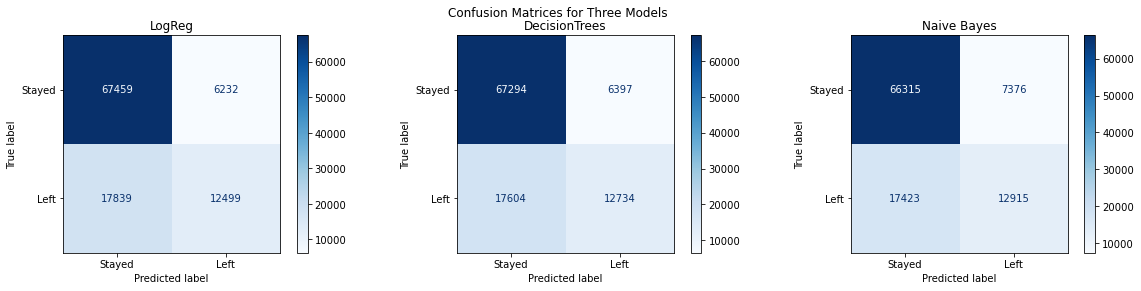

In [49]:
# Compute confusion matrices for each model
cm_1 = metrics.confusion_matrix(y_test, y_predLR)
cm_2 = metrics.confusion_matrix(y_test, y_pred_gsdt)
cm_3 = metrics.confusion_matrix(y_test, GSnb_pred)

# Plot confusion matrices in subplots
# Plot confusion matrices in subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4))
cm_display_1 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=['Stayed', 'Left'])
cm_display_2 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=['Stayed', 'Left'])
cm_display_3 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=['Stayed', 'Left'])
cm_display_1.plot(ax=ax1, cmap='Blues')
cm_display_2.plot(ax=ax2, cmap='Blues')
cm_display_3.plot(ax=ax3, cmap='Blues')

# Add labels and title
ax1.set_title('LogReg')
ax2.set_title('DecisionTrees')
ax3.set_title('Naive Bayes')
fig.suptitle('Confusion Matrices for Three Models')


# Show plot
plt.show()


# 7. COMPARING PRECISION-RECALL CURVES FOR MODELS

In [65]:
#Naive Bayes Probabilities
# predict test class:
y_probs_testnb = GSnb.predict_proba(X_test)[:,1]
y_probs_trainnb = GSnb.predict_proba(X_train)[:,1]


#logRegression probabilities
# predict test class:
y_probs_test = logreg.predict_proba(X_test)[:,1]
y_probs_train = logreg.predict_proba(X_train)[:,1]


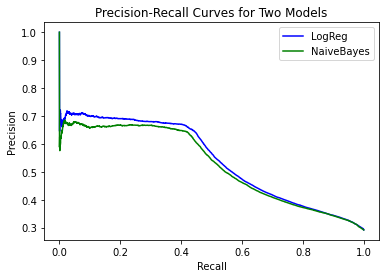

In [66]:
# Get precision and recall values for each model
precision_1, recall_1, thresholds_1 = precision_recall_curve(y_test, y_probs_test)
precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test, y_probs_testnb)

# Plot precision-recall curve for each model
plt.plot(recall_1, precision_1, 'b', label='LogReg')
plt.plot(recall_2, precision_2, 'g', label='NaiveBayes')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Two Models')

# Add legend
plt.legend()

# Show plot
plt.show()

# 8. DETERMINING THRESHOLDS FOR 80% RECALL

In [67]:
#write recall precision and thresholds for log reg into a df
df_PRC_lR =pd.DataFrame([recall_1,precision_1, thresholds_1])

#transpose
df_PRC_lR=df_PRC_lR.transpose()

#name the columns
df_PRC_lR.columns=['recall','precision', 'thresholds']


In [68]:
#write recall precision and thresholds for NB into a df
df_PRC_nb =pd.DataFrame([recall_2,precision_2, thresholds_2])

#transpose
df_PRC_nb=df_PRC_nb.transpose()

#name the columns
df_PRC_nb.columns=['recall','precision', 'thresholds']



In [70]:
df_filtered=df_PRC_lR.loc[df_PRC_lR['recall']>0.80]

In [71]:
df_filtered

,recall,precision,thresholds
0,1.000000,0.291672,0.015581
1,0.999967,0.291668,0.016079
2,0.999967,0.291671,0.017357
3,0.999967,0.291674,0.019220
4,0.999934,0.291746,0.019385
...,...,...,...
3861,0.800218,0.376715,0.215981
3862,0.800218,0.376721,0.215995
3863,0.800185,0.376723,0.216009
3864,0.800053,0.376772,0.216034


In [72]:
df_filtered2 = df_PRC_lR.loc[df_PRC_nb['recall']>0.8]

In [73]:
df_filtered2

,recall,precision,thresholds
0,1.000000,0.291672,0.015581
1,0.999967,0.291668,0.016079
2,0.999967,0.291671,0.017357
3,0.999967,0.291674,0.019220
4,0.999934,0.291746,0.019385
...,...,...,...
3755,0.814095,0.371471,0.212831
3756,0.814029,0.371530,0.212872
3757,0.813963,0.371545,0.212875
3758,0.813963,0.371551,0.212889


In [80]:
# Make Predictions based on at least 80% recall
# predicted test probability for logreg
y_pred_lrtest = np.array([0 if x < 0.216 else 1 for x in y_probs_test])
y_pred_lrtrain = np.array([0 if x < 0.5 else 1 for x in y_probs_train])

# predicted test probability for naive bayes
y_pred_testnb = np.array([0 if x < 0.213 else 1 for x in y_probs_test])
y_pred_trainnb = np.array([0 if x < 0.5 else 1 for x in y_probs_train])

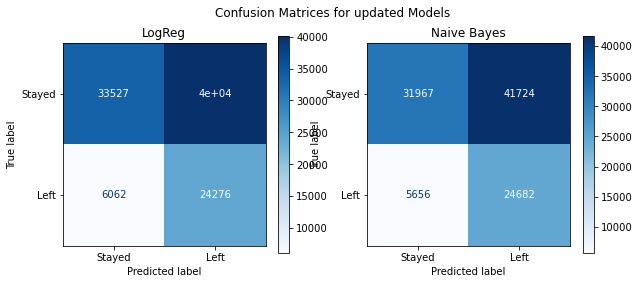

In [82]:
#new confusion matrices on using a different threshold
# Compute confusion matrices for each model
cm_4 = metrics.confusion_matrix(y_test, y_pred_lrtest)

cm_5 = metrics.confusion_matrix(y_test, y_pred_testnb)

# Plot confusion matrices in subplots
# Plot confusion matrices in subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
cm_display_4 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_4, display_labels=['Stayed', 'Left'])
cm_display_5 = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_5, display_labels=['Stayed', 'Left'])

cm_display_4.plot(ax=ax1, cmap='Blues')
cm_display_5.plot(ax=ax2, cmap='Blues')


# Add labels and title
ax1.set_title('LogReg')

ax2.set_title('Naive Bayes')
fig.suptitle('Confusion Matrices for updated Models')


# Show plot
plt.show()


# 9. Shap Values 

In [94]:
explainer = shap.LinearExplainer(logreg, X)

In [95]:
shap_values = explainer.shap_values(X_test)

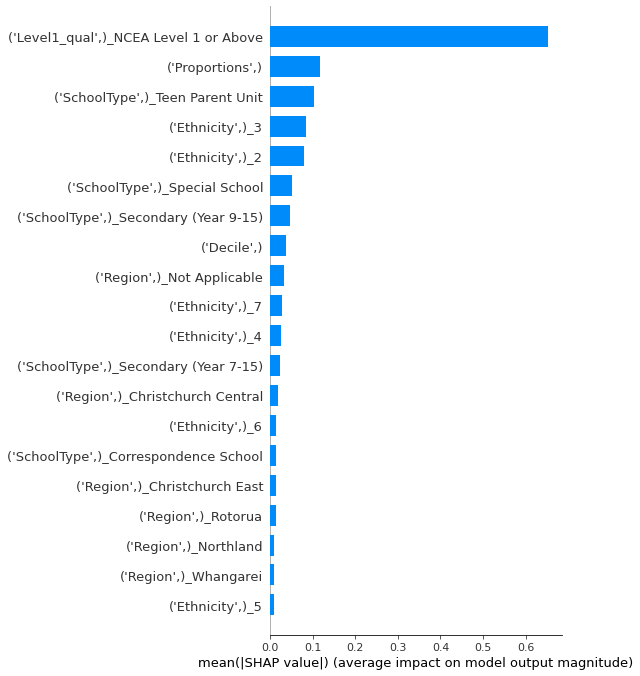

In [96]:
shap.summary_plot(shap_values, X, plot_type='bar')

In [100]:
# Initialize your Jupyter notebook with initjs(), otherwise you will get an error message.
shap.initjs()

# Write in a function
def shap_plot(j):
    explainerModel = shap.LinearExplainer(logreg, X)
    shap_values_Model = explainerModel.shap_values(X_test)
    p = shap.force_plot(logreg.predict_proba(X_test.iloc[[j]])[0][1], shap_values_Model[j], X_test.iloc[[j]])
    return(p)

In [101]:
shap_plot(1)

In [102]:
shap_plot(100)

## 10. ROC Curve for all the models

In [83]:
#LR roc baseline 
fpr_base, tpr_base, _ = roc_curve(y_test, y_pred_logreg)
tpr_base

array([0.        , 0.41261784, 1.        ])

In [84]:
auc_base = auc(fpr_base, tpr_base)
auc_base

0.6638139065473688

In [86]:
#LR roc 
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lrtest)
tpr_lr

array([0.        , 0.80018459, 1.        ])

In [87]:
auc_lr = auc(fpr_lr, tpr_lr)
auc_lr

0.6275759753540515

In [88]:
#NB roc
fpr_nb, tpr_nb, _ = roc_curve(y_test,y_pred_testnb)

In [89]:
auc_nb = auc(fpr_nb, tpr_nb)
auc_nb

0.6236825146413111

In [90]:
#RF roc
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)

In [91]:
auc_dt = auc(fpr_dt, tpr_dt)
auc_dt

0.6508707050000275

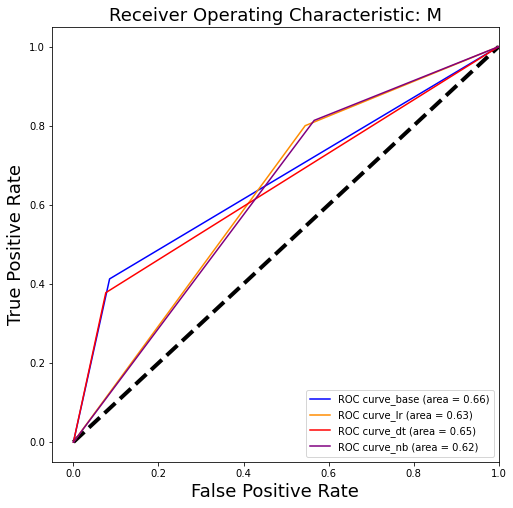

In [92]:
plt.figure(figsize=[8,8])
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver Operating Characteristic: M', fontsize=18)

plt.plot(fpr_base, tpr_base, color='blue', label = 'ROC curve_base (area = %0.2f)' % auc_base)
plt.plot(fpr_lr, tpr_lr, color='darkorange', label = 'ROC curve_lr (area = %0.2f)' % auc_lr)

plt.plot(fpr_dt, tpr_dt, color='red', label = 'ROC curve_dt (area = %0.2f)' % auc_dt)

plt.plot(fpr_nb, tpr_nb, color='purple', label = 'ROC curve_nb (area = %0.2f)' % auc_nb)

plt.legend(loc="lower right")

plt.show()